In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import bagging
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import cross_val_score

import joblib

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
%store -r cdc_new

pd.set_option('display.max_columns', 500)

cdc_new.head()

,age,sex,race,martial,weight,height,overweight,education,income,home,employment,health,binge,coverage,checkup,primaryphysician,exercise,heavyalcohol,smoker,any_alcohol,sleep_avg,heart_dis,cancer,depression,stroke,diabete3,asthma3,heart_attack,skin_cancer,chronic_bronchitis,kidney_disease,arthritis,bmi,obese,comorbid,chronic
0,1.000000,1.0,0.0,0.666667,0.085763,0.422222,1.0,1.000000,0.010101,1.0,1.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.260870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.131337,0.0,0.0,1.0
1,0.241935,1.0,0.2,1.000000,0.205832,0.444444,0.0,1.000000,0.000000,0.0,1.0,0.5,0.0,0.0,0.333333,1.0,1.0,0.0,1.0,1.0,0.173913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231763,1.0,0.0,0.0
2,0.935484,1.0,0.0,0.666667,0.106346,0.288889,0.0,0.333333,0.000000,1.0,0.5,1.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.260870,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198764,0.0,1.0,1.0
3,0.774194,0.0,0.0,0.333333,0.188679,0.555556,0.0,0.333333,0.000000,1.0,0.5,0.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176642,0.0,0.0,0.0
4,1.000000,1.0,0.0,0.666667,0.157804,0.377778,0.0,0.666667,1.000000,1.0,0.5,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.217391,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.215074,1.0,1.0,1.0


In [3]:
#selecting the target and independent variables

#independent variables
X = cdc_new.drop(['chronic', 'heart_dis', 'cancer', 'stroke', 'diabete3', 
              'heart_attack', 'skin_cancer', 'chronic_bronchitis', 'kidney_disease', 
              'arthritis', 'comorbid', 'arthritis', 'depression', 'asthma3',
              
               'height',  'exercise', 'education',
             'obese', 'overweight', 'coverage', 'binge'
                  
              ], axis=1)
#target variable
y = cdc_new.chronic

X.head()

,age,sex,race,martial,weight,income,home,employment,health,checkup,primaryphysician,heavyalcohol,smoker,any_alcohol,sleep_avg,bmi
0,1.000000,1.0,0.0,0.666667,0.085763,0.010101,1.0,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.260870,0.131337
1,0.241935,1.0,0.2,1.000000,0.205832,0.000000,0.0,1.0,0.5,0.333333,1.0,0.0,1.0,1.0,0.173913,0.231763
2,0.935484,1.0,0.0,0.666667,0.106346,0.000000,1.0,0.5,1.0,0.000000,1.0,0.0,0.0,0.0,0.260870,0.198764
3,0.774194,0.0,0.0,0.333333,0.188679,0.000000,1.0,0.5,0.0,0.000000,1.0,0.0,0.0,0.0,0.217391,0.176642
4,1.000000,1.0,0.0,0.666667,0.157804,1.000000,1.0,0.5,0.0,0.000000,1.0,0.0,0.0,0.0,0.217391,0.215074


In [4]:
#scaling data to put data points on a scale of zero to one

scaler = MinMaxScaler()

scaled_cdc = scaler.fit_transform(X)

scaled_cdc_sub = pd.DataFrame(scaled_cdc, columns=X.columns)

scaled_cdc_sub.round(2)

scaled_cdc_sub.head(2)

,age,sex,race,martial,weight,income,home,employment,health,checkup,primaryphysician,heavyalcohol,smoker,any_alcohol,sleep_avg,bmi
0,1.000000,1.0,0.0,0.666667,0.085763,0.010101,1.0,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.260870,0.131337
1,0.241935,1.0,0.2,1.000000,0.205832,0.000000,0.0,1.0,0.5,0.333333,1.0,0.0,1.0,1.0,0.173913,0.231763


In [5]:
#splitting data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [6]:
#Fitting models to Random Forst calssifier
R_forest = RandomForestClassifier()

R_forest = RandomForestClassifier( n_estimators=300,criterion='gini' , random_state=28)
R_model = R_forest.fit(X_train, y_train)

In [7]:
# #saving the model 
# with open("random_model.pkl","wb") as Random_model:
    
#     joblib.dump(R_model,Random_model, compress=7)
    

In [8]:
R_model.score(X_test, y_test)

0.7579013322103187

In [9]:
a = pd.DataFrame(R_model.feature_importances_)

a['features'] = X_train.columns

a.columns = ['importance', 'features']
a = a.sort_values(by='importance', ascending=False)

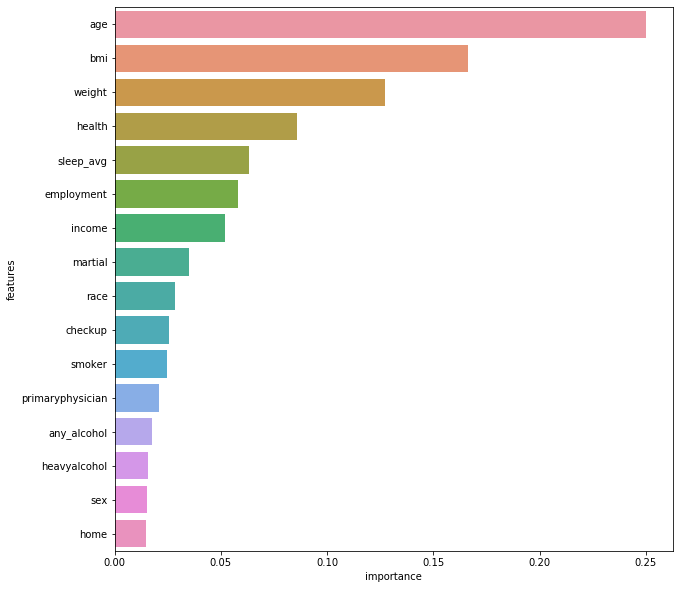

In [10]:
plt.figure(figsize=(10, 10))
sns.barplot(a.importance, a.features)

In [11]:
strength = R_model.feature_importances_
features = X_train.columns
df = pd.DataFrame(features, strength)
df.reset_index()


,index,0
0,0.250125,age
1,0.014972,sex
2,0.028215,race
3,0.035185,martial
4,0.127312,weight
5,0.051987,income
6,0.014550,home
7,0.058030,employment
8,0.085907,health
9,0.025678,checkup


In [12]:
pred = R_model.predict(X_test)

#Confusion matrix and classification report
forest_confusion = confusion_matrix(y_test, pred, normalize='true')
forest_report = classification_report(y_test, pred)

print(forest_confusion)
print(forest_report)

[[0.75208482 0.24791518]
 [0.23650541 0.76349459]]
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75     47726
         1.0       0.76      0.76      0.76     49631

    accuracy                           0.76     97357
   macro avg       0.76      0.76      0.76     97357
weighted avg       0.76      0.76      0.76     97357



In [13]:
forest_confusion = forest_confusion.round(2)
forest_confusion

array([[0.75, 0.25],
       [0.24, 0.76]])

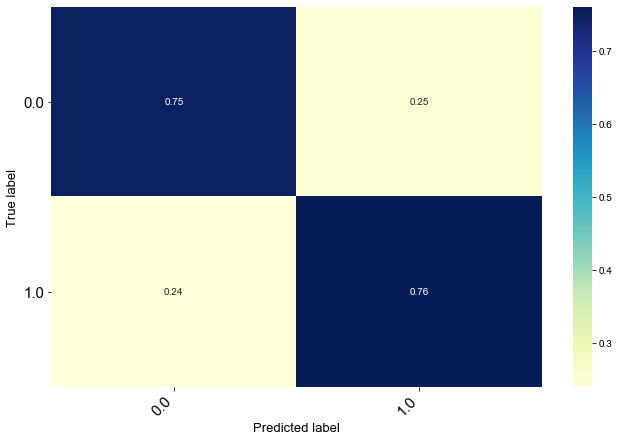

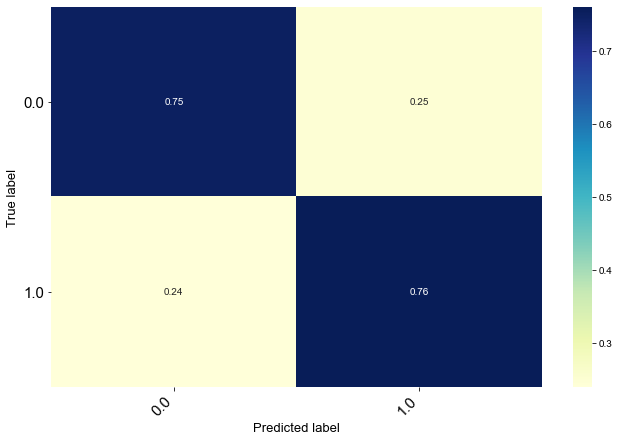

In [14]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (11,7), fontsize=19):
    
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize )
    try:
        heatmap = sns.heatmap(df_cm, annot=True, cmap='YlGnBu')
        sns.set(font_scale=2)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    
    plt.ylabel('True label', fontsize=13)
    plt.xlabel('Predicted label', fontsize=13)
    
    return fig


forest_classes = R_model.classes_

print_confusion_matrix(forest_confusion, forest_classes, figsize =(11,7), fontsize=15, )


In [15]:

forest_classes  = ['yes', 'no']